In [1]:
import glob
import cv2
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm

from model_single_train import ModelSingleTrain
from model_cross_validation import ModelCrossValidation

In [2]:
FOLD_NUMBER = 5
SEED = 42

In [3]:
# read data

base_folder = "C:/Users/martae/Desktop/repos/Mild-Depression-Detection/preprocessed_data"

data = []
for i in glob.glob(f'{base_folder}/**/*.png', recursive=True):
    data.append(cv2.imread(i))

all_data = len(data)

In [4]:
MILD_DEPRESSION = 51
NO_DEPRESSION = 21

healthy_ratio = NO_DEPRESSION/(NO_DEPRESSION + MILD_DEPRESSION)
print(healthy_ratio)

depression_ratio = 1 - healthy_ratio
print(depression_ratio)

0.2916666666666667
0.7083333333333333


In [5]:
# get labels

labels = []

healthy_data = healthy_ratio * all_data
depression_data = all_data - healthy_data
print(healthy_data)
print(depression_data)

for i in range(len(data)):
    if i < depression_data:
        labels.append(1)
    else:
        labels.append(0)

print(len(labels))

525.0
1275.0
1800


In [6]:
data = np.array(data)
print(data.shape)
labels = np.array(labels)
print(labels.shape)

(1800, 112, 112, 3)
(1800,)


In [7]:
# reshape 4d to 2d
# based on https://bic-berkeley.github.io/psych-214-fall-2016/reshape_and_4d.html

vol_shape = data.shape[1:]
print(vol_shape)
n_voxels = np.prod(vol_shape)
print(n_voxels)
reshaped_data = data.reshape(n_voxels, data.shape[0])
data = np.transpose(reshaped_data)
print(data.shape)

(112, 112, 3)
37632
(1800, 37632)


In [8]:
# split into training and test data

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=SEED)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1440, 37632)
(360, 37632)
(1440,)
(360,)


### SVM

In [9]:
svm_clf = svm.SVC(kernel='linear', probability=True, random_state=SEED)

#### Single train

In [10]:
svm_model_object = ModelSingleTrain(svm_clf, X_train, y_train, X_test, y_test, SEED)
svm_model_object.main_cycle()


Train balanced accuracy 1.0

Train precision 1.0

Train recall 1.0

Train f1 score 1.0


Validation balanced accuracy 1.0

Validation precision 1.0

Validation recall 1.0

Validation f1 score 1.0


Test balanced accuracy 1.0

Test precision 1.0

Test recall 1.0

Test f1 score 1.0



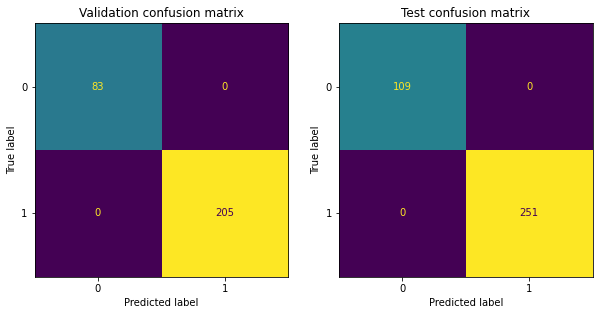

In [11]:
svm_model_object.display_confusion_matrix()

#### Cross Validation

In [12]:
svm_model_object = ModelCrossValidation(svm_clf, X_train, y_train, X_test, y_test, FOLD_NUMBER)
svm_model_object.main_cycle()

In [13]:
svm_model_object.display_test_results()

Test balanced accuracy 0.9952191235059761

Test roc auc 1.0

Test precision 0.9935119047619047

Test recall 0.9933333333333334

Test f1 score 0.9933585421219513


### Random Forest

In [14]:
rf_clf = RandomForestClassifier(random_state=SEED, 
                                n_estimators=50, 
                                criterion="entropy")

#### Single Train

In [15]:
rf_model_object = ModelSingleTrain(rf_clf, X_train, y_train, X_test, y_test, SEED)
rf_model_object.main_cycle()


Train balanced accuracy 1.0

Train precision 1.0

Train recall 1.0

Train f1 score 1.0


Validation balanced accuracy 1.0

Validation precision 1.0

Validation recall 1.0

Validation f1 score 1.0


Test balanced accuracy 0.9940239043824701

Test precision 0.9918898809523808

Test recall 0.9916666666666667

Test f1 score 0.9916981776524392



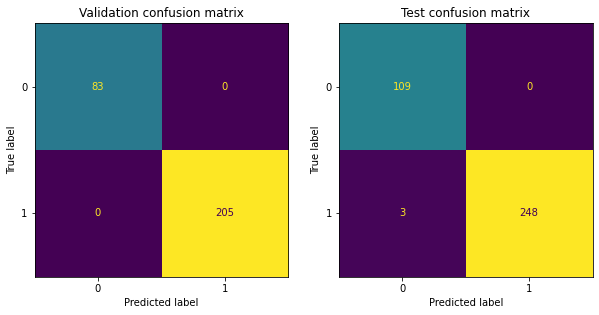

In [16]:
rf_model_object.display_confusion_matrix()

#### Cross Validation

In [17]:
rf_model_object = ModelCrossValidation(rf_clf, X_train, y_train, X_test, y_test, FOLD_NUMBER)
rf_model_object.main_cycle()

In [18]:
rf_model_object.display_test_results()

Test balanced accuracy 0.99402390438247

Test roc auc 0.9999561387477612

Test precision 0.9918898809523808

Test recall 0.9916666666666668

Test f1 score 0.9916981776524392


### XGBoost

In [19]:
xgb_clf = XGBClassifier(booster='gbtree',
                        eta = 0.2,
                        min_child_weight=1,
                        max_depth=5,
                        gamma=0.5,
                        random_state=SEED)

#### Single Train

In [20]:
xgb_model_object = ModelSingleTrain(xgb_clf, X_train, y_train, X_test, y_test, SEED)
xgb_model_object.main_cycle()


Train balanced accuracy 1.0

Train precision 1.0

Train recall 1.0

Train f1 score 1.0


Validation balanced accuracy 1.0

Validation precision 1.0

Validation recall 1.0

Validation f1 score 1.0


Test balanced accuracy 1.0

Test precision 1.0

Test recall 1.0

Test f1 score 1.0



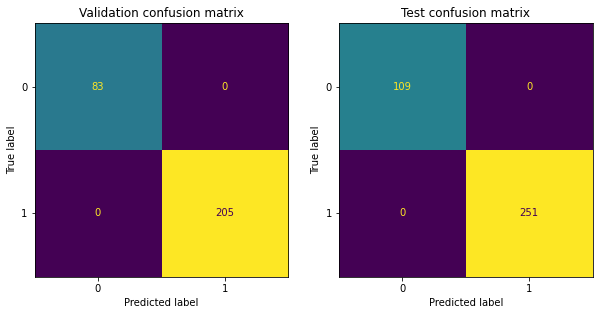

In [21]:
xgb_model_object.display_confusion_matrix()

#### Cross Validation

In [22]:
xgb_model_object = ModelCrossValidation(xgb_clf, X_train, y_train, X_test, y_test, FOLD_NUMBER)
xgb_model_object.main_cycle()

In [23]:
rf_model_object.display_test_results()

Test balanced accuracy 0.99402390438247

Test roc auc 0.9999561387477612

Test precision 0.9918898809523808

Test recall 0.9916666666666668

Test f1 score 0.9916981776524392


### AdaBoost

In [24]:
adb_clf = AdaBoostClassifier(n_estimators=100, 
                            random_state=SEED)

#### Single Train

In [25]:
adb_model_object = ModelSingleTrain(adb_clf, X_train, y_train, X_test, y_test, SEED)
adb_model_object.main_cycle()


Train balanced accuracy 1.0

Train precision 1.0

Train recall 1.0

Train f1 score 1.0


Validation balanced accuracy 1.0

Validation precision 1.0

Validation recall 1.0

Validation f1 score 1.0


Test balanced accuracy 0.9940239043824701

Test precision 0.9918898809523808

Test recall 0.9916666666666667

Test f1 score 0.9916981776524392



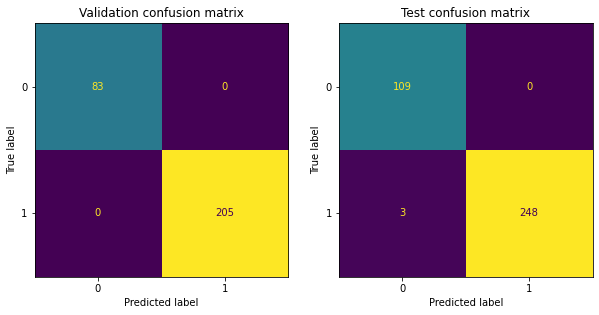

In [26]:
adb_model_object.display_confusion_matrix()

#### Cross Validation

In [27]:
adb_model_object = ModelCrossValidation(adb_clf, X_train, y_train, X_test, y_test, FOLD_NUMBER)
adb_model_object.main_cycle()

In [28]:
adb_model_object.display_test_results()

Test balanced accuracy 0.9976095617529881

Test roc auc 1.0

Test precision 0.9967559523809524

Test recall 0.9966666666666667

Test f1 score 0.9966792710609755
